<a href="https://colab.research.google.com/github/andresvii/HelloPico8/blob/master/Bitcoin_price__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd       #Data analysis and Manipulation
from fbprophet import Prophet # Bitcoin Price Prediction


In [ ]:
import plotly.offline as py           # create table
import plotly.graph_objs as go        #create candlestick charts             # Importing Plotly
import plotly.express as px           #create Violin plots, pie charts, box plot, scatter plots,line graph, area graph

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly 

## Task 4 :Crypto Specific Financial Data Visualization- Bitcoin

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin_data.csv to bitcoin_data.csv


In [ ]:
df_bitcoin = pd.read_csv('bitcoin_data.csv')

In [ ]:
df_bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2201,2020-09-26,10702.237305,10778.500000,10682.082031,10754.437500,10754.437500,1.810501e+10
2202,2020-09-27,10752.939453,10804.732422,10643.458008,10774.426758,10774.426758,1.801688e+10
2203,2020-09-28,10771.641602,10949.123047,10716.676758,10721.327148,10721.327148,2.272037e+10
2204,2020-09-29,10712.462891,10858.939453,10665.344727,10848.830078,10848.830078,2.045987e+10


In [ ]:
# Bitcoin specific Area graph
px.area(df_bitcoin, x="Date", y="Close")

In [ ]:
px.line(df_bitcoin, x="Date", y="Volume")

In [ ]:
# Bitcoin specific Violin plot
px.violin(df_bitcoin,  y="Volume")

In [ ]:
# CandleStick Charts- Financial data visualization
fig = go.Figure(go.Candlestick(
                            x=df_bitcoin["Date"],
                            open=df_bitcoin['Open'],
                            high=df_bitcoin['High'],
                            low=df_bitcoin['Low'],
                            close=df_bitcoin['Close']
                            ))

fig.show()

# Bitcoin Prediction using Facebook Prophet

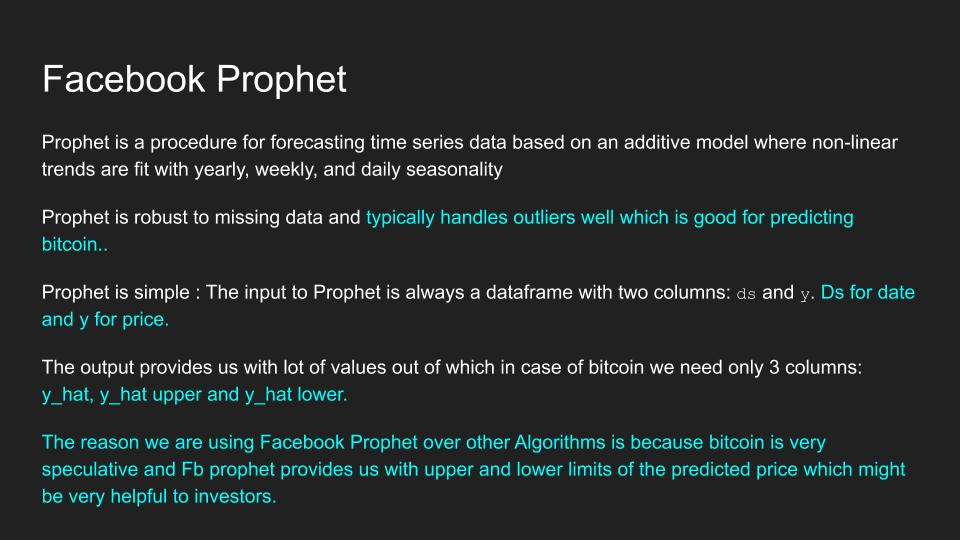

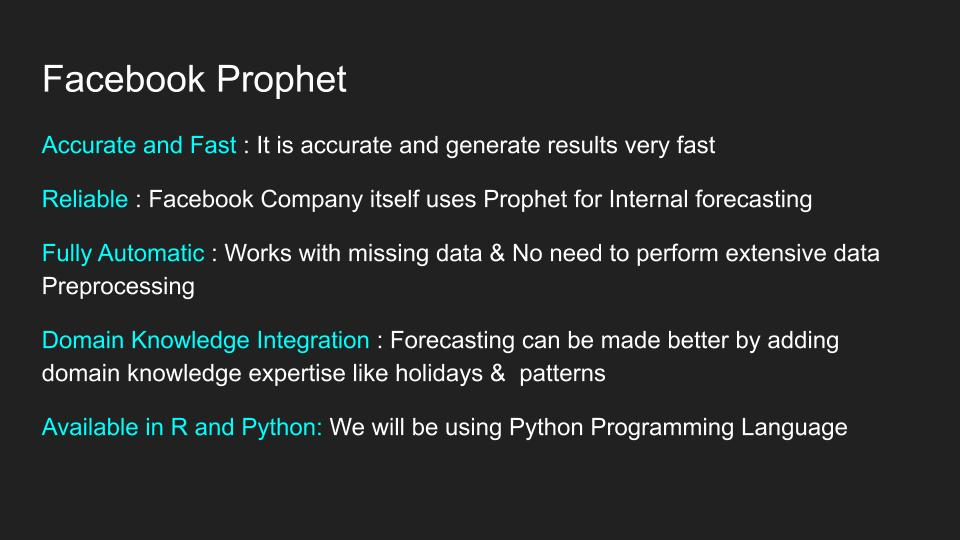

In [ ]:
# We have imported fb Prophet in the first task.

## Task 5:  Data Preperation

In [ ]:
columns = ["Date", "Close"]
df1 = pd.DataFrame(df_bitcoin, columns=columns)

In [ ]:
df1

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2201,2020-09-26,10754.437500
2202,2020-09-27,10774.426758
2203,2020-09-28,10721.327148
2204,2020-09-29,10848.830078


In [ ]:
prophet_df = df1.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
2201,2020-09-26,10754.437500
2202,2020-09-27,10774.426758
2203,2020-09-28,10721.327148
2204,2020-09-29,10848.830078


## Task 6: Modelling

In [ ]:
m = Prophet()

In [ ]:
m.fit(prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Task 7: Forecasting

In [ ]:
#future = m.make_future_dataframe(periods=80)

In [ ]:
future = m.make_future_dataframe(periods=364)

In [ ]:
future

,ds
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
2565,2021-09-25
2566,2021-09-26
2567,2021-09-27
2568,2021-09-28


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,468.142612,-481.835545,2141.505418,468.142612,468.142612,310.845504,310.845504,310.845504,3.208378,3.208378,3.208378,307.637126,307.637126,307.637126,0.0,0.0,0.0,778.988116
1,2014-09-18,467.585449,-650.126864,2064.570397,467.585449,467.585449,270.728957,270.728957,270.728957,-14.454500,-14.454500,-14.454500,285.183458,285.183458,285.183458,0.0,0.0,0.0,738.314406
2,2014-09-19,467.028285,-622.262432,2111.264346,467.028285,467.028285,259.020082,259.020082,259.020082,-2.583910,-2.583910,-2.583910,261.603993,261.603993,261.603993,0.0,0.0,0.0,726.048367
3,2014-09-20,466.471121,-610.512137,2078.745580,466.471121,466.471121,245.864729,245.864729,245.864729,9.118442,9.118442,9.118442,236.746287,236.746287,236.746287,0.0,0.0,0.0,712.335851
4,2014-09-21,465.913958,-678.855884,2018.544509,465.913958,465.913958,202.342195,202.342195,202.342195,-8.156843,-8.156843,-8.156843,210.499038,210.499038,210.499038,0.0,0.0,0.0,668.256152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,2021-09-25,10032.398450,3145.804339,17009.918319,3034.786330,16764.928287,92.142620,92.142620,92.142620,9.118442,9.118442,9.118442,83.024178,83.024178,83.024178,0.0,0.0,0.0,10124.541070
2566,2021-09-26,10034.032134,2963.972485,16690.049399,3021.990736,16797.558970,41.604098,41.604098,41.604098,-8.156843,-8.156843,-8.156843,49.760941,49.760941,49.760941,0.0,0.0,0.0,10075.636232
2567,2021-09-27,10035.665818,2819.926037,16758.036964,2974.636079,16830.189652,28.705493,28.705493,28.705493,13.041043,13.041043,13.041043,15.664451,15.664451,15.664451,0.0,0.0,0.0,10064.371312
2568,2021-09-28,10037.299503,2800.209967,16716.106043,2927.709009,16862.820334,-19.132767,-19.132767,-19.132767,-0.172609,-0.172609,-0.172609,-18.960158,-18.960158,-18.960158,0.0,0.0,0.0,10018.166736


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2565,2021-09-25,10124.541070,3145.804339,17009.918319
2566,2021-09-26,10075.636232,2963.972485,16690.049399
2567,2021-09-27,10064.371312,2819.926037,16758.036964
2568,2021-09-28,10018.166736,2800.209967,16716.106043
2569,2021-09-29,9988.386592,2679.504843,16954.908189


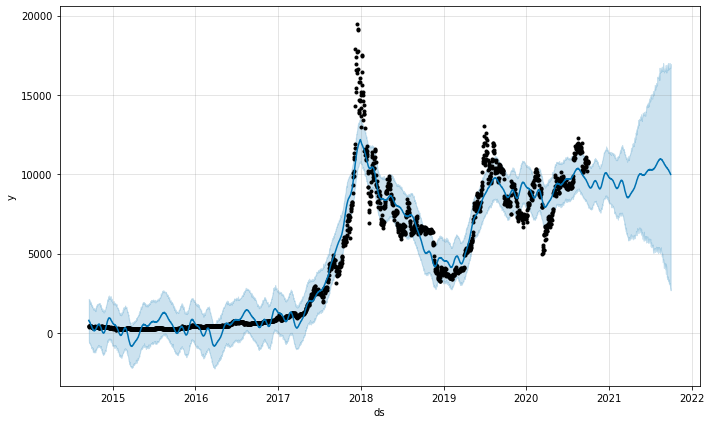

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

In [ ]:
future.tail()

,ds
2565,2021-09-25
2566,2021-09-26
2567,2021-09-27
2568,2021-09-28
2569,2021-09-29


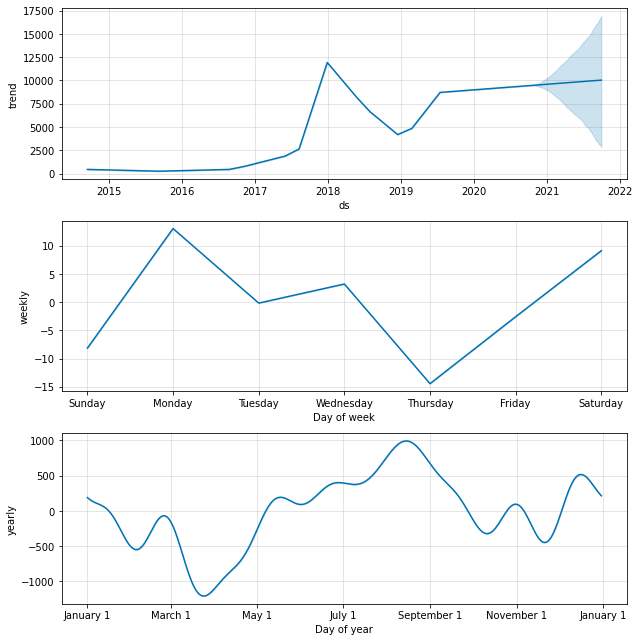

In [ ]:
figure2 = m.plot_components(forecast)

In [ ]:
#https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4
df=df_bitcoin
metric_df = forecast.set_index('ds')
#print(metric_df)

#[['yhat']].join(df.set_index('ds').y).reset_index()
#metric_df[['yhat']].join(df_bitcoin.set_index('ds').y).reset_index()
print(metric_df[['trend']])

#.join(df_bitcoin.set_index('Date').y).reset_index()
#print(df_bitcoin[['Date','Close']])

metric_df2 = df_bitcoin.set_index('Date')

print(metric_df2[['Close']])

tttt=metric_df[['trend']].join(metric_df2[['Close']])
tttt.dropna(inplace=True)
print(tttt)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print(r2_score(tttt.trend, tttt.Close))
mean_squared_error(tttt.trend, tttt.Close)
mean_absolute_error(tttt.trend, tttt.Close)

 



                   trend
ds                      
2014-09-17    468.142612
2014-09-18    467.585449
2014-09-19    467.028285
2014-09-20    466.471121
2014-09-21    465.913958
...                  ...
2021-09-25  10032.398450
2021-09-26  10034.032134
2021-09-27  10035.665818
2021-09-28  10037.299503
2021-09-29  10038.933187

[2570 rows x 1 columns]
                   Close
Date                    
2014-09-17    457.334015
2014-09-18    424.440002
2014-09-19    394.795990
2014-09-20    408.903992
2014-09-21    398.821014
...                  ...
2020-09-26  10754.437500
2020-09-27  10774.426758
2020-09-28  10721.327148
2020-09-29  10848.830078
2020-09-30  10787.618164

[2206 rows x 1 columns]
                  trend         Close
ds                                   
2014-09-17   468.142612    457.334015
2014-09-18   467.585449    424.440002
2014-09-19   467.028285    394.795990
2014-09-20   466.471121    408.903992
2014-09-21   465.913958    398.821014
...                 ...           

700.9789675735923

In [ ]:
#https://nextjournal.com/eric-brown/forecasting-with-prophet-part-4
#from   import ml_metrics as metrics
#metrics.mae(tttt.trend, tttt.Close)
#metrics.ae(tttt.trend, tttt.Close)
#metrics.rmse(metric_df.y, metric_df.yhat)

##Task 8: Downloading the Forecast data

In [ ]:
forecast.to_csv('forecast.csv')

In [ ]:
from google.colab import files
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>